In [ ]:
'''
# Spotify  provides wide range of fatures about songs such as : Popularity, 
 Explicit, Danceability, Energy, Key, Loudness, Mode, Speechiness,
 Acousticness, Instrumentalness, Liveness, Valence,Tempo

Most of these features are already numeric or with a little bit of data
manipulation they can be converted into numeric data. Numeric features
allows creating song segments (genres). I used the methods we learned
in class and offered segmentation for stotify song list consisting of 
3k songs. (Previously I have shared the code to retrieve data from
Spotify)

Similar project with different spotify data (2k songs) and code is given here:
https://thecleverprogrammer.com/2022/04/05/clustering-music-genres-with-machine-learning/
'''




In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# pembe uyarilardan kurtulmak icin: 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# EDA

In [3]:
df = pd.read_csv("music_data.csv")

In [4]:
df.drop(['Unnamed: 0','Album ID', 'Track ID', 'External URLs','Release Date','Duration (ms)'], axis =1 , inplace=True)

In [5]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
Track Name,...Ready For It?,Life Changes,24K Magic,Galway Girl,Photograph,Havana (feat. Young Thug),When I Was Your Man,Gonna Fly Now,Don't Wanna Know (feat. Kendrick Lamar),Thinking out Loud,...,Thunderclouds,Nina Cried Power (feat. Mavis Staples),Moment's Silence (Common Tongue),NFWMB,Everywhere,The Spectre,Happier,Drew Barrymore,Let You Love Me,No Stylist (feat. Drake)
Artists,Taylor Swift,Thomas Rhett,Bruno Mars,Ed Sheeran,Ed Sheeran,"Camila Cabello, Young Thug",Bruno Mars,Bill Conti,"Maroon 5, Kendrick Lamar",Ed Sheeran,...,"Sia, Diplo, Labrinth, LSD","Hozier, Mavis Staples",Hozier,Hozier,Michelle Branch,Alan Walker,"Marshmello, Bastille",Bryce Vine,Rita Ora,"French Montana, Drake"
Album Name,...Ready For It?,Life Changes,24K Magic,÷ (Deluxe),x (Deluxe Edition),Havana (feat. Young Thug),Unorthodox Jukebox,Rocky III: Music From The Motion Picture,Red Pill Blues (Deluxe),x (Deluxe Edition),...,Thunderclouds,Nina Cried Power - EP,Nina Cried Power - EP,Nina Cried Power - EP,The Spirit Room,The Spectre,Happier,Drew Barrymore,Let You Love Me,No Stylist
Popularity,0,63,81,80,86,1,89,57,0,84,...,0,40,57,59,68,76,82,63,60,63
Explicit,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
Danceability,0.615,0.687,0.818,0.624,0.614,0.768,0.612,0.415,0.776,0.781,...,0.691,0.29,0.516,0.379,0.523,0.654,0.687,0.758,0.531,0.765
Energy,0.779,0.845,0.803,0.876,0.379,0.517,0.28,0.538,0.62,0.445,...,0.716,0.889,0.593,0.373,0.828,0.711,0.792,0.574,0.854,0.704
Key,2,7,1,9,4,7,0,9,7,2,...,7,1,0,3,1,1,5,11,10,5
Loudness,-6.454,-4.37,-4.282,-3.374,-10.48,-4.323,-8.648,-12.71,-6.198,-6.061,...,-5.985,-2.611,-5.09,-12.176,-4.696,-7.437,-2.749,-6.889,-3.149,-4.589
Mode,1,1,1,1,1,0,1,0,1,1,...,1,1,1,0,1,0,1,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        3000 non-null   object 
 1   Artists           3000 non-null   object 
 2   Album Name        3000 non-null   object 
 3   Popularity        3000 non-null   int64  
 4   Explicit          3000 non-null   bool   
 5   Danceability      3000 non-null   float64
 6   Energy            3000 non-null   float64
 7   Key               3000 non-null   int64  
 8   Loudness          3000 non-null   float64
 9   Mode              3000 non-null   int64  
 10  Speechiness       3000 non-null   float64
 11  Acousticness      3000 non-null   float64
 12  Instrumentalness  3000 non-null   float64
 13  Liveness          3000 non-null   float64
 14  Valence           3000 non-null   float64
 15  Tempo             3000 non-null   float64
dtypes: bool(1), float64(9), int64(3), object(3

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
x = df[['Popularity','Explicit', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',\
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',\
       'Valence', 'Tempo']]

In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Popularity        3000 non-null   int64  
 1   Explicit          3000 non-null   bool   
 2   Danceability      3000 non-null   float64
 3   Energy            3000 non-null   float64
 4   Key               3000 non-null   int64  
 5   Loudness          3000 non-null   float64
 6   Mode              3000 non-null   int64  
 7   Speechiness       3000 non-null   float64
 8   Acousticness      3000 non-null   float64
 9   Instrumentalness  3000 non-null   float64
 10  Liveness          3000 non-null   float64
 11  Valence           3000 non-null   float64
 12  Tempo             3000 non-null   float64
dtypes: bool(1), float64(9), int64(3)
memory usage: 284.3 KB


In [10]:
d = {False : 0, True: 1}
#x['Explicit'] = x['Explicit'].map(d)

def bool2num(var) :
    if var == True:
        return 1
    else :
        return 0
    

x['Explicit'] = x['Explicit'].apply(bool2num)

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [64]:
model = KMeans(6)
model = model.fit(x)

In [65]:
tahmin = model.predict(x)

In [66]:
tahmin

array([2, 0, 0, ..., 5, 0, 5])

In [67]:
x['cluster'] = tahmin

In [68]:
x.head()

,Popularity,Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,cluster
0,0,0,0.615,0.779,2,-6.454,1,0.1350,0.0665,0.000000,0.1550,0.453,160.000,2
1,63,0,0.687,0.845,7,-4.370,1,0.0576,0.1000,0.000000,0.0452,0.809,87.972,0
2,81,0,0.818,0.803,1,-4.282,1,0.0797,0.0340,0.000000,0.1530,0.632,106.970,0
3,80,0,0.624,0.876,9,-3.374,1,0.1000,0.0735,0.000000,0.3270,0.781,99.943,0
4,86,0,0.614,0.379,4,-10.480,1,0.0476,0.6070,0.000464,0.0986,0.201,107.989,0


In [69]:
x['cluster'].value_counts()

3    793
0    782
1    460
4    416
5    379
2    170
Name: cluster, dtype: int64

In [70]:
silhouette_score(x,tahmin) 
# score cok fark etmiyor kac gruba ayrimamizin en optimuma yakinligini goruyroz

0.4004886802701425

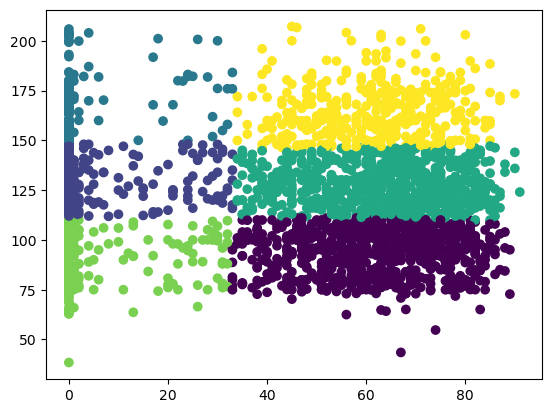

In [78]:
plt.figure()
plt.scatter(x.Popularity, x.Tempo, c = tahmin)

In [72]:
allscore= []
allclusters = []
distances = []
def clust(kactane):
    for i in range(1,kactane):
        i = i+1
        model   = KMeans(i)
        model   = model.fit(x)
        tahmin  = model.predict(x)
        score   = silhouette_score(x,tahmin)
        distance = model.inertia_
        print('cluster ',i," score: ", score)
        allscore.append(score) 
        allclusters.append(i)
        distances.append(distance)

In [73]:
clust(10)

cluster  2  score:  0.45547713795218425
cluster  3  score:  0.43694276064070575
cluster  4  score:  0.42523571959913337
cluster  5  score:  0.40416389335068503
cluster  6  score:  0.39874140410709846
cluster  7  score:  0.40241936971297976
cluster  8  score:  0.3872503059043076
cluster  9  score:  0.3685064537015343
cluster  10  score:  0.34508219693894365


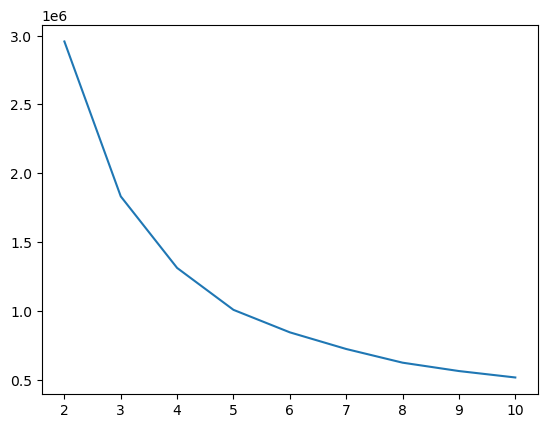

In [74]:
plt.plot(allclusters,distances)

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage
link_data = linkage(x, method = "ward", metric = "euclidean")

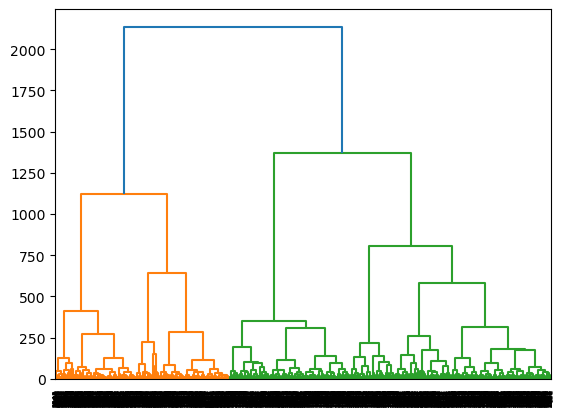

In [76]:
dendrogram(link_data)
plt.show()